In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
import random

In [3]:
parts = [
    'Engine 1', 'Engine 2', 'Combustor 1', 'Combustor 2', 'Turbine 1', 'Turbine 2', 
    'Wing Flap Left', 'Wing Flap Right', 'Landing Gear Front', 'Landing Gear Rear',
    'Avionics System', 'Fuel System', 'Hydraulic System', 'Electrical System', 
    'Navigation System', 'Airframe', 'Nose Cone', 'Rudder', 'Elevator', 'Aileron Left',
    'Aileron Right', 'Spoilers', 'Tail Fin', 'Fuselage'
]

In [4]:
all_parts = parts * 4  

In [5]:
airlines = [
    'Emirates', 'Etihad', 'Qatar Airways', 'American Airlines', 'Indigo', 
    'Air India', 'Air Asia', 'Singapore Airlines', 'Vistara', 'Spice Jet', 
    'British Airways'
]

aircraft_types = [
    'Boeing 737', 'Boeing 747', 'Boeing 777', 'Airbus A320', 'Bombardier CRJ', 
    'Airbus A380', 'Embraer e175', 'ATR 72'
]

In [6]:
n = len(all_parts)
data = {
    'Part Name': all_parts,
    'Function': np.random.choice(['Propulsion', 'Control', 'Support', 'Safety', 'Navigation', 'Fuel'], size=n),
    'Current Condition': np.random.choice(['Good', 'Fair', 'Poor'], size=n),
    'Usage Hours': np.random.randint(100, 10000, size=n),
    'Last Maintenance Date': [datetime.now() - timedelta(days=np.random.randint(30, 365)) for _ in range(n)],
    'Risk of Failure': np.random.rand(n),  # 0 to 1 risk score
    'Airline': np.random.choice(airlines, size=n),  # Random assignment of airlines
    'Aircraft Type': np.random.choice(aircraft_types, size=n),  # Random assignment of aircraft types
    'Aircraft Number': [f'AC-{i:03d}' for i in range(1, n+1)]  # Unique aircraft numbers
}

In [7]:
df = pd.DataFrame(data)

In [8]:
df['Predicted Damage'] = df['Current Condition'].apply(lambda x: 1 if x == 'Poor' else 0)

In [9]:
df['Predicted Time to Failure (hours)'] = df['Risk of Failure'].apply(lambda x: 500 * (1 - x))

In [10]:
ordered_columns = ['Aircraft Number', 'Airline', 'Aircraft Type', 'Part Name', 'Function', 
                   'Current Condition', 'Usage Hours', 'Last Maintenance Date', 
                   'Risk of Failure', 'Predicted Damage', 'Predicted Time to Failure (hours)']

df = df[ordered_columns]

In [11]:
df.to_csv('aircraft_parts_data_with_airlines_updated.csv', index=False)

In [12]:
print(df.head())

  Aircraft Number            Airline Aircraft Type    Part Name    Function  \
0          AC-001          Spice Jet        ATR 72     Engine 1     Support   
1          AC-002            Vistara    Boeing 737     Engine 2      Safety   
2          AC-003           Air Asia  Embraer e175  Combustor 1  Navigation   
3          AC-004          Air India    Boeing 737  Combustor 2      Safety   
4          AC-005  American Airlines    Boeing 737    Turbine 1     Support   

  Current Condition  Usage Hours      Last Maintenance Date  Risk of Failure  \
0              Poor         3248 2023-10-09 16:15:06.733945         0.022847   
1              Poor         8040 2024-02-02 16:15:06.733945         0.141566   
2              Poor         5267 2023-11-28 16:15:06.733945         0.511388   
3              Good          225 2024-01-09 16:15:06.733945         0.526824   
4              Good         5068 2024-07-29 16:15:06.733945         0.920841   

   Predicted Damage  Predicted Time to Failu

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('aircraft_parts_data_with_airlines_updated.csv', parse_dates=['Last Maintenance Date'])

In [15]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Aircraft Number                    96 non-null     object        
 1   Airline                            96 non-null     object        
 2   Aircraft Type                      96 non-null     object        
 3   Part Name                          96 non-null     object        
 4   Function                           96 non-null     object        
 5   Current Condition                  96 non-null     object        
 6   Usage Hours                        96 non-null     int64         
 7   Last Maintenance Date              96 non-null     datetime64[ns]
 8   Risk of Failure                    96 non-null     float64       
 9   Predicted Damage                   96 non-null     int64         
 10  Predicted Time to F

In [16]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Usage Hours          Last Maintenance Date  Risk of Failure  \
count    96.000000                             96        96.000000   
mean   5059.208333  2024-02-21 18:45:06.734837760         0.553787   
min     225.000000     2023-09-24 16:15:06.734930         0.022847   
25%    2501.250000  2023-12-15 16:15:06.734929920         0.330467   
50%    5147.000000  2024-02-05 04:15:06.734437376         0.546763   
75%    6812.250000  2024-04-28 22:15:06.734929920         0.792000   
max    9930.000000     2024-08-16 16:15:06.734930         0.998486   
std    2670.540773                            NaN         0.284736   

       Predicted Damage  Predicted Time to Failure (hours)  
count         96.000000                          96.000000  
mean           0.322917                         223.106381  
min            0.000000                           0.757069  
25%            0.000000                         103.999848  
50%            0.000000                    

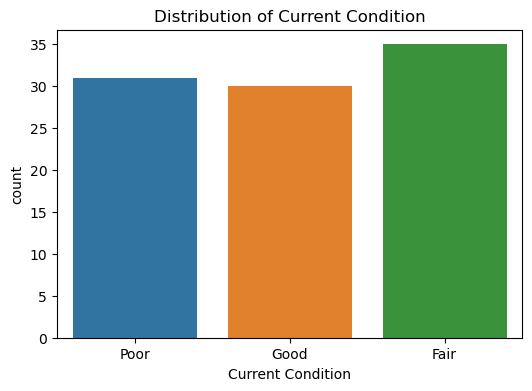

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Current Condition')
plt.title('Distribution of Current Condition')
plt.show()

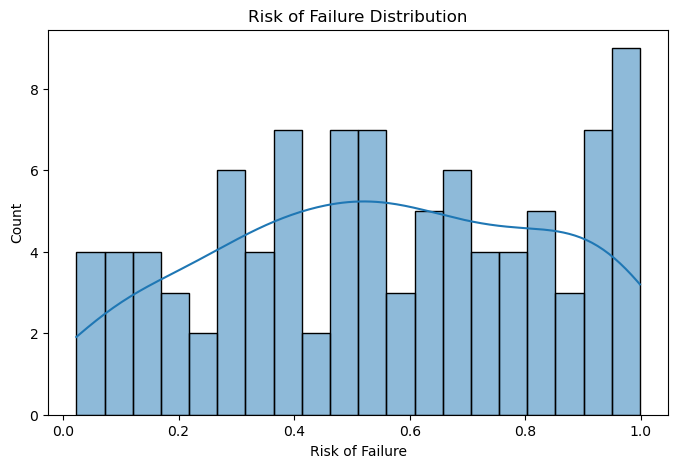

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Risk of Failure'], bins=20, kde=True)
plt.title('Risk of Failure Distribution')
plt.show()

C:\Users\tarun\AppData\Local\Temp\ipykernel_27352\2883278084.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Part Name', y='Usage Hours', ci=None)


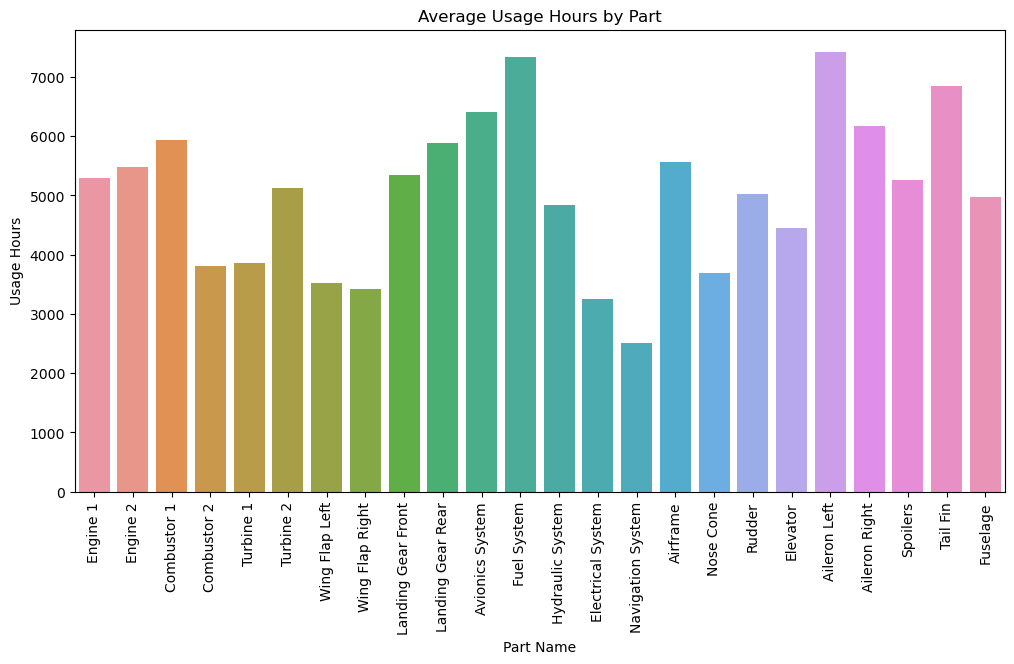

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Part Name', y='Usage Hours', ci=None)
plt.title('Average Usage Hours by Part')
plt.xticks(rotation=90)
plt.show()

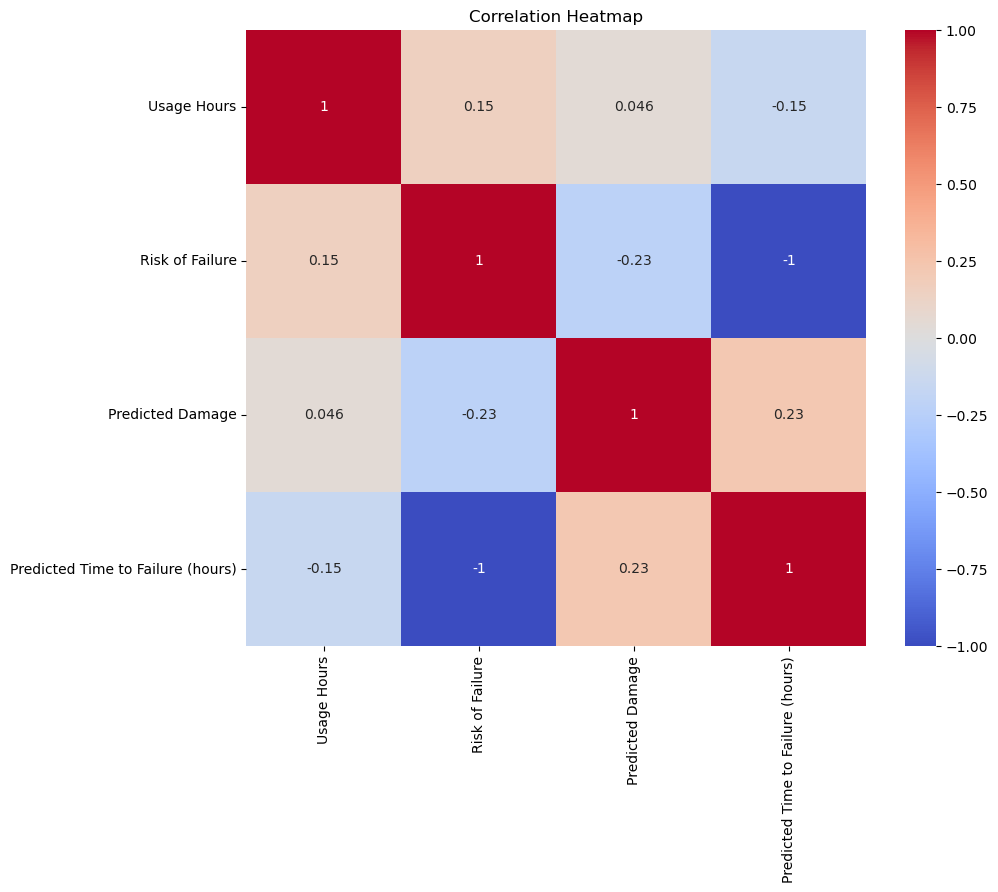

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

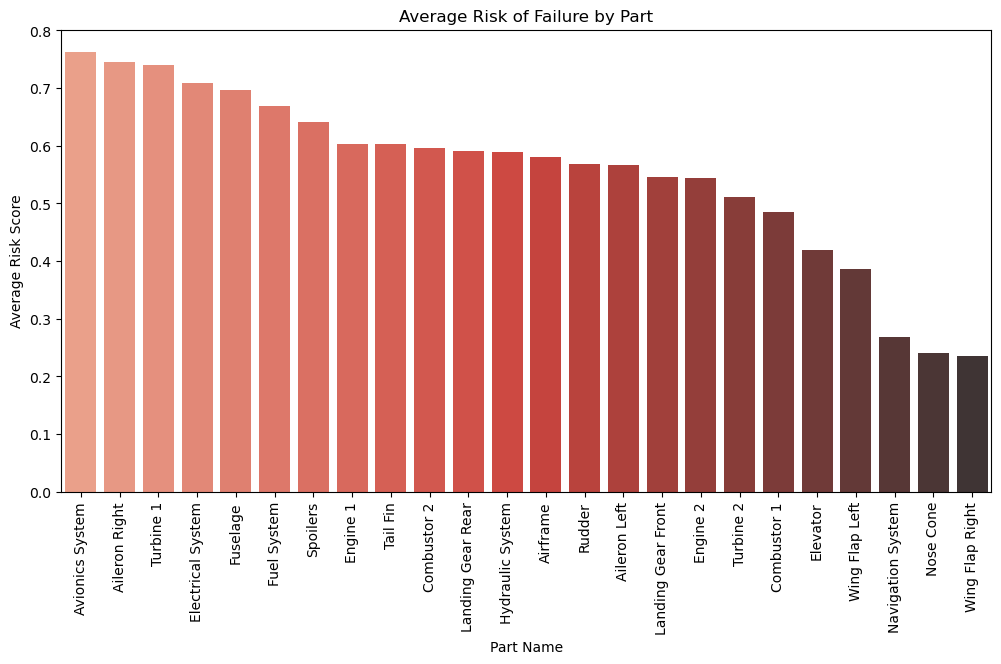

In [21]:
risk_by_part = df.groupby('Part Name')['Risk of Failure'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=risk_by_part.index, y=risk_by_part.values, palette='Reds_d')
plt.title('Average Risk of Failure by Part')
plt.ylabel('Average Risk Score')
plt.xlabel('Part Name')
plt.xticks(rotation=90)
plt.show()

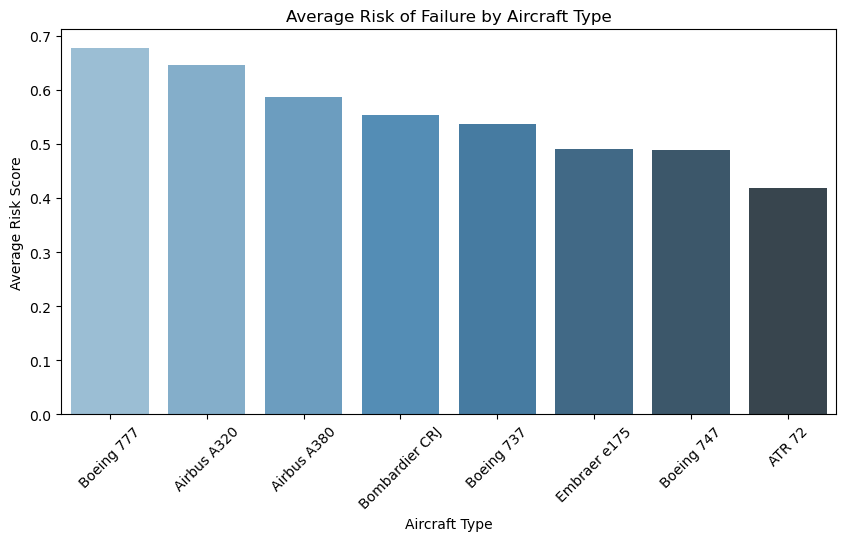

In [22]:
risk_by_aircraft = df.groupby('Aircraft Type')['Risk of Failure'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=risk_by_aircraft.index, y=risk_by_aircraft.values, palette='Blues_d')
plt.title('Average Risk of Failure by Aircraft Type')
plt.ylabel('Average Risk Score')
plt.xlabel('Aircraft Type')
plt.xticks(rotation=45)
plt.show()

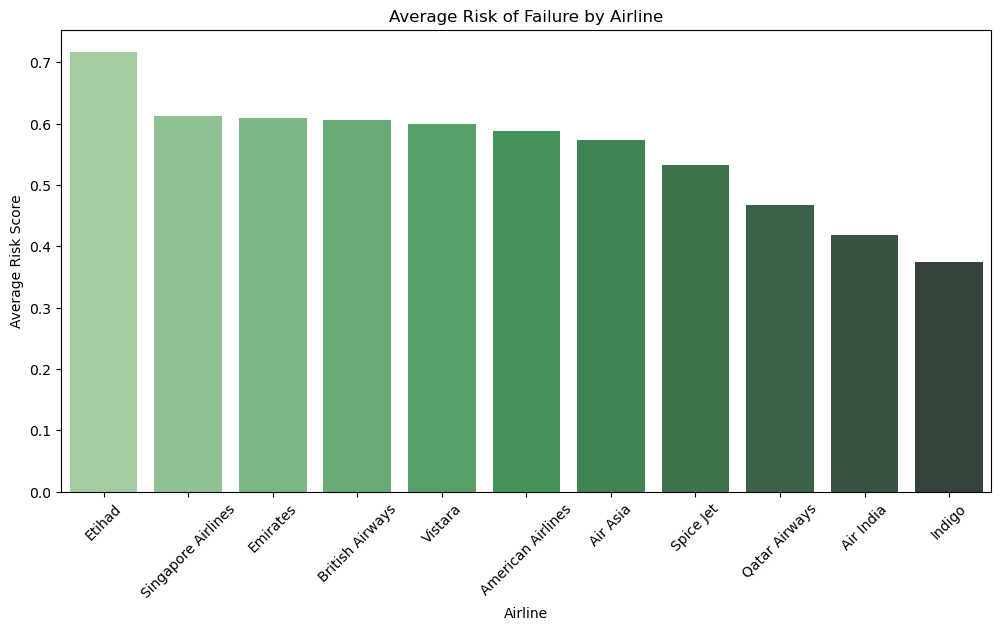

In [23]:
risk_by_airline = df.groupby('Airline')['Risk of Failure'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=risk_by_airline.index, y=risk_by_airline.values, palette='Greens_d')
plt.title('Average Risk of Failure by Airline')
plt.ylabel('Average Risk Score')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
label_encoders = {}
categorical_cols = ['Part Name', 'Function', 'Airline', 'Aircraft Type', 'Current Condition']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df[['Part Name', 'Function', 'Airline', 'Aircraft Type', 'Current Condition', 'Usage Hours', 'Risk of Failure']]
y = df['Predicted Damage']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
y_pred_log = log_reg.predict(X_test_scaled)

In [30]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



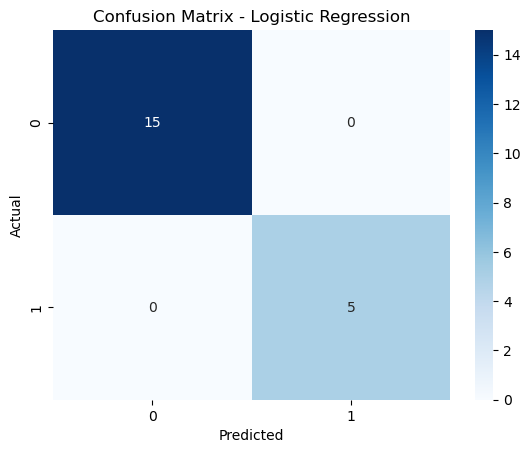

In [31]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred_rf = rf_clf.predict(X_test_scaled)

In [35]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



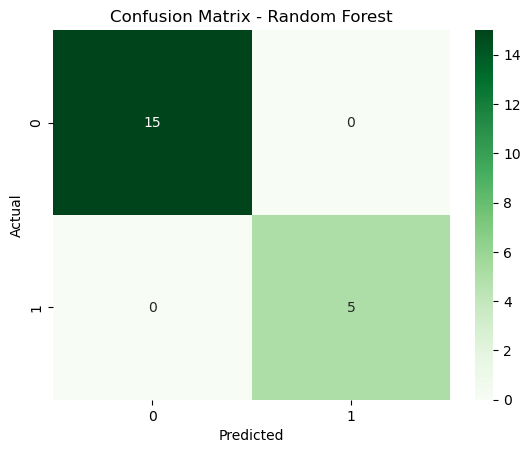

In [36]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
files.download('aircraft_parts_data_with_airlines_updated.csv')

NameError: name 'files' is not defined

In [39]:
df.to_csv('aircraft_parts_data_with_airlines_updated.csv', index=False)